In [1]:
from physical_parameters_SciNet.model_instances.n2_setting_mast_constant_time import config
from physical_parameters_SciNet.utils.build_dataset import mast_dataset

import torch
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [2]:
path = config.DIR_RAW_DATA / "mast_magnetics_data_constant_time.nc"
ds = xr.open_dataset(path)

In [3]:
ds

<xarray.Dataset> Size: 5GB
Dimensions:                                   (shot_id: 6102, time: 1000,
                                               b_field_pol_probe_ccbv_channel: 37,
                                               b_field_pol_probe_obr_channel: 18,
                                               b_field_pol_probe_obv_channel: 17,
                                               flux_loop_channel: 14,
                                               b_field_tor_probe_saddle_voltage_channel: 9)
Coordinates:
  * shot_id                                   (shot_id) int32 24kB 12378 ... ...
  * time                                      (time) float64 8kB -0.05 ... 0.45
  * b_field_pol_probe_ccbv_channel            (b_field_pol_probe_ccbv_channel) object 296B ...
  * b_field_pol_probe_obr_channel             (b_field_pol_probe_obr_channel) object 144B ...
  * b_field_pol_probe_obv_channel             (b_field_pol_probe_obv_channel) object 136B ...
  * flux_loop_channel                         (flux_loop_channel) object 112B ...
  * b_field_tor_probe_saddle_voltage_channel  (b_field_tor_probe_saddle_voltage_channel) object 72B ...
Data variables:
    b_field_pol_probe_ccbv_field              (shot_id, time, b_field_pol_probe_ccbv_channel) float64 2GB ...
    b_field_pol_probe_obr_field               (shot_id, time, b_field_pol_probe_obr_channel) float64 879MB ...
    b_field_pol_probe_obv_field               (shot_id, time, b_field_pol_probe_obv_channel) float64 830MB ...
    flux_loop_flux                            (shot_id, time, flux_loop_channel) float64 683MB ...
    b_field_tor_probe_saddle_voltage          (shot_id, time, b_field_tor_probe_saddle_voltage_channel) float64 439MB ...
    ip_ref                                    (shot_id, time) float64 49MB ...
    i_plasma                                  (shot_id, time) float64 49MB ...
    ip                                        (shot_id, time) float64 49MB ...

/tmp/ipykernel_2616595/2924384381.py:1: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  idx = np.random.randint(0, ds.dims['shot_id'])


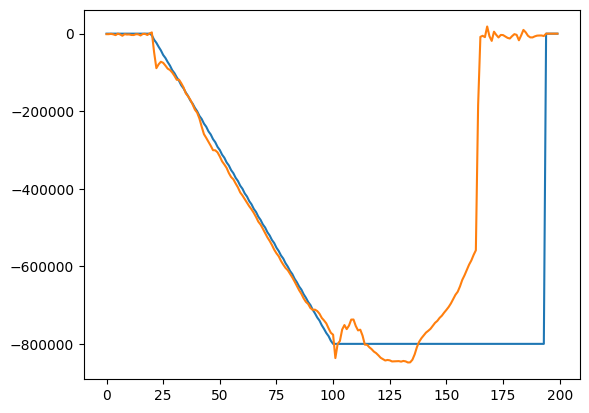

In [4]:
idx = np.random.randint(0, ds.dims['shot_id'])
plt.plot(ds.i_plasma.values[idx, :][::5])
plt.plot(ds.ip_ref.values[idx, :][::5])

In [23]:
print(f"{'Variables':35} | {'Shape':20} | {'NaN':5}")
for var in ds.data_vars:
    print(f"{var:35} | {ds[var].shape} | {ds[var].isnull().sum().values}")

Variables                           | Shape                | NaN  
b_field_pol_probe_ccbv_field        | (6102, 1000, 37) | 0
b_field_pol_probe_obr_field         | (6102, 1000, 18) | 0
b_field_pol_probe_obv_field         | (6102, 1000, 17) | 0
flux_loop_flux                      | (6102, 1000, 14) | 0
b_field_tor_probe_saddle_voltage    | (6102, 1000, 9) | 0
ip_ref                              | (6102, 1000) | 0
i_plasma                            | (6102, 1000) | 0
ip                                  | (6102, 1000) | 0


In [28]:
path = config.DIR_PREPROCESSED_DATA / "mast_scinet_train_dataset.pt"
train_dataset = torch.load(path)

/tmp/ipykernel_3311083/588429449.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_dataset = torch.load(path)


In [35]:
print(train_dataset[0][0])
print(train_dataset[0][0].shape)

tensor([-1.7129e+03, -4.5693e+03, -2.8546e+03, -2.7757e+03, -5.6060e+03,
        -4.1695e+03, -1.8331e+03, -4.2047e+02, -5.5630e+03, -4.2981e+03,
        -4.2046e+03, -3.3490e+03, -5.4248e+03, -6.8898e+03, -5.5587e+03,
        -6.3859e+03, -3.6068e+03, -6.8623e+03, -7.1203e+03, -1.7493e+04,
        -1.3288e+04,  8.8851e+04,  1.6652e+05,  1.5395e+05,  1.4271e+05,
         1.3358e+05,  1.3435e+05,  1.3303e+05,  1.3909e+05,  1.3925e+05,
         1.4588e+05,  1.5390e+05,  1.6318e+05,  1.7141e+05,  1.8094e+05,
         1.8949e+05,  1.9823e+05,  2.0741e+05,  2.1484e+05,  2.2480e+05,
         2.3418e+05,  2.4442e+05,  2.5940e+05,  2.7360e+05,  2.9202e+05,
         3.0564e+05,  3.1632e+05,  3.2858e+05,  3.4347e+05,  3.5757e+05,
         3.6779e+05,  3.7895e+05,  3.9301e+05,  4.0152e+05,  4.0814e+05,
         4.2012e+05,  4.3304e+05,  4.4335e+05,  4.5252e+05,  4.6459e+05,
         4.7814e+05,  4.8301e+05,  4.9190e+05,  5.0477e+05,  5.1989e+05,
         5.2937e+05,  5.4052e+05,  5.4612e+05,  5.5

In [38]:
obs_nan, ques_nan, answ_nan = 0, 0, 0
for obs, ques, answ in tqdm.tqdm(train_dataset):
    obs_nan += torch.isnan(obs).sum().item()
    ques_nan += torch.isnan(ques).sum().item()
    answ_nan += torch.isnan(answ).sum().item()
print(f"NaN in observations: {obs_nan}, questions: {ques_nan}, answers: {answ_nan}")

  0%|          | 0/4271 [00:00<?, ?it/s]

100%|██████████| 4271/4271 [00:02<00:00, 1839.26it/s]

NaN in observations: 0, questions: 0, answers: 0


In [21]:
path = config.DIR_RAW_DATA / "mast_magnetics_data_variable_time.nc"
ds = xr.open_dataset(path)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [22]:
ds

<xarray.Dataset> Size: 5GB
Dimensions:                                   (shot_id: 6102, time: 1000,
                                               b_field_pol_probe_ccbv_channel: 37,
                                               b_field_pol_probe_obr_channel: 18,
                                               b_field_pol_probe_obv_channel: 17,
                                               flux_loop_channel: 14,
                                               b_field_tor_probe_saddle_voltage_channel: 9)
Coordinates:
  * shot_id                                   (shot_id) int32 24kB 12378 ... ...
  * time                                      (time) float64 8kB -0.05 ... 0.45
  * b_field_pol_probe_ccbv_channel            (b_field_pol_probe_ccbv_channel) object 296B ...
  * b_field_pol_probe_obr_channel             (b_field_pol_probe_obr_channel) object 144B ...
  * b_field_pol_probe_obv_channel             (b_field_pol_probe_obv_channel) object 136B ...
  * flux_loop_channel                         (flux_loop_channel) object 112B ...
  * b_field_tor_probe_saddle_voltage_channel  (b_field_tor_probe_saddle_voltage_channel) object 72B ...
Data variables:
    b_field_pol_probe_ccbv_field              (shot_id, time, b_field_pol_probe_ccbv_channel) float64 2GB ...
    b_field_pol_probe_obr_field               (shot_id, time, b_field_pol_probe_obr_channel) float64 879MB ...
    b_field_pol_probe_obv_field               (shot_id, time, b_field_pol_probe_obv_channel) float64 830MB ...
    flux_loop_flux                            (shot_id, time, flux_loop_channel) float64 683MB ...
    b_field_tor_probe_saddle_voltage          (shot_id, time, b_field_tor_probe_saddle_voltage_channel) float64 439MB ...
    ip_ref                                    (shot_id, time) float64 49MB 1....
    i_plasma                                  (shot_id, time) float64 49MB 0....
    ip                                        (shot_id, time) float64 49MB ...

In [ ]:
plt.plot(ds.i_plasma.values[:50000][::1])
plt.plot(ds.ip_ref.values[:50000][::1])

Error in callback <function _draw_all_if_interactive at 0x7f3defaa0a40> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

### Many ip for powerpoint


In [14]:
def plot_12_ip(ds, shots_id):
    fig, axs = plt.subplots(3, 4, figsize=(20, 10))
    for i, ax in enumerate(axs.flatten()):
        ip = ds.isel(shot_id=shots_id[i]).ip.values
        time = ds.isel(shot_id=shots_id[i]).time.values
        ax.plot(time, ip, label=f"Shot ID: {shots_id[i]}")
        ax.legend()
        if i % 4 == 0:
            ax.set_ylabel("Plasma Current (Ip) [A]")
        if i >= 8:
            ax.set_xlabel("Time [s]")
        else:
            ax.set_xticks([])
    plt.suptitle("Plasma Current (Ip) for different shots")
    plt.tight_layout()
    plt.show()


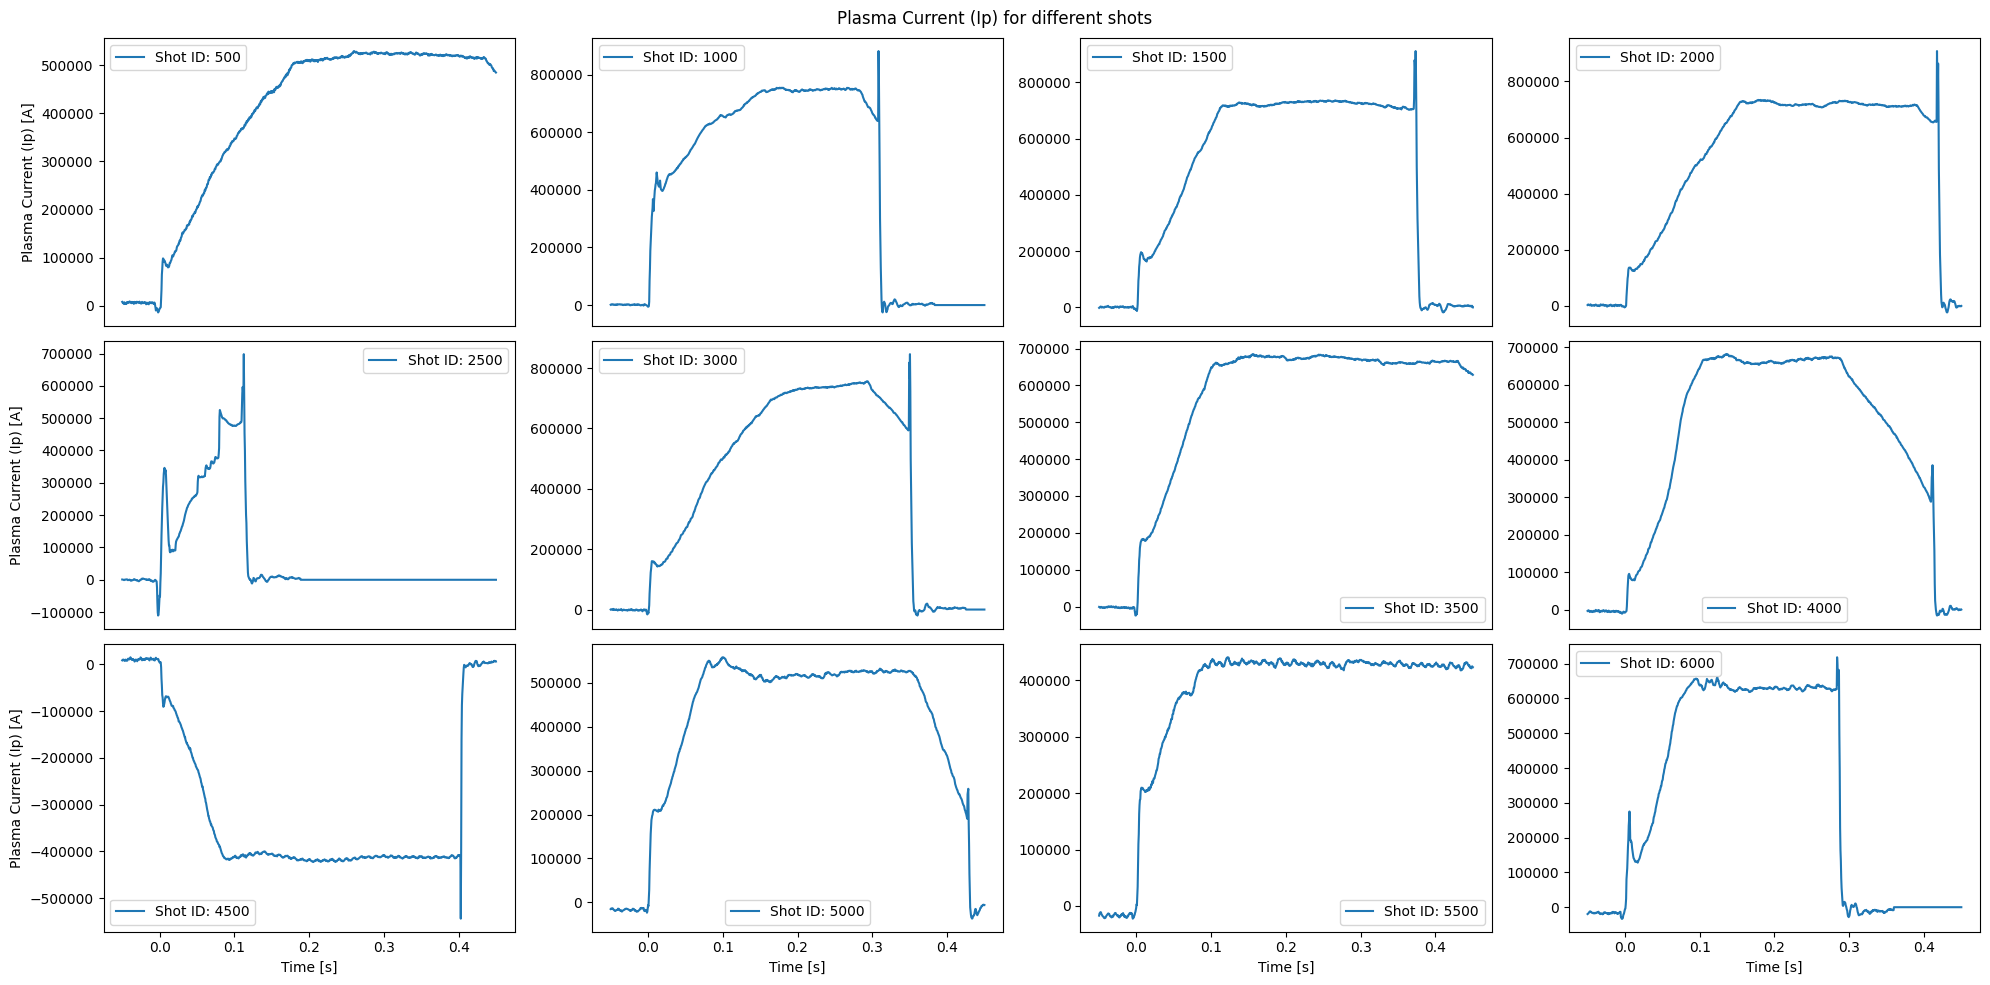

In [15]:
shot_ids = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000]
plot_12_ip(ds, shot_ids)

### IP, schedule & mag prob for powerpoint

In [16]:
shot_id = 5000

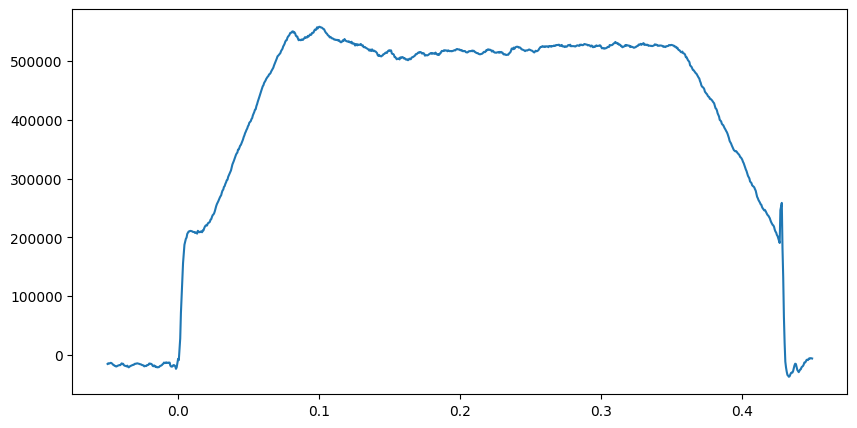

In [17]:
# Print ip

ip = ds.isel(shot_id=shot_id).ip.values
time = ds.isel(shot_id=shot_id).time.values
plt.figure(figsize=(10, 5))
plt.plot(time, ip, label=f"Shot ID: {shot_id}")
plt.show()

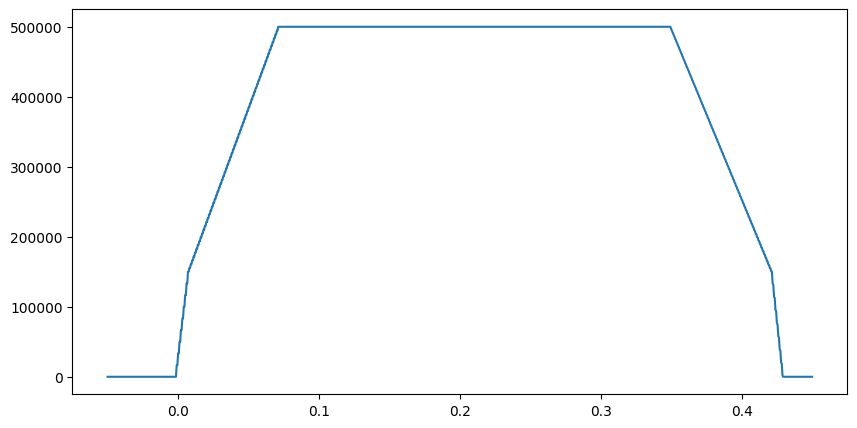

In [18]:
# Print ip_schedule

ip = ds.isel(shot_id=shot_id).i_plasma.values
time = ds.isel(shot_id=shot_id).time.values
plt.figure(figsize=(10, 5))
plt.plot(time, ip, label=f"Shot ID: {shot_id}")
plt.show()

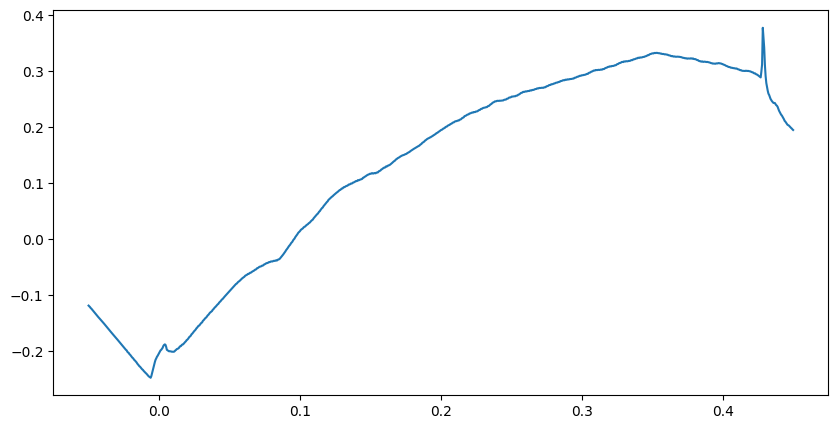

In [22]:
# Print magnetic_probe

ip = ds.isel(shot_id=shot_id).b_field_pol_probe_ccbv_field.values[:, 2]
time = ds.isel(shot_id=shot_id).time.values
plt.figure(figsize=(10, 5))
plt.plot(time, ip, label=f"Shot ID: {shot_id}")
plt.show()

### Trend - Seasonality for ip


In [ ]:
path = config.DIR_RAW_DATA / "mast_magnetics_data_const_time.nc"
ds2 = xr.open_dataset(path)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
ds2